# Лабораторная работа №3

In [436]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Считывание данных из двух датасетов - тренингового и тестового

In [437]:
df_train = pd.read_csv('./data/adult.data.csv', skipinitialspace=True, na_values="?")
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [438]:
df_test = pd.read_csv('./data/adult.test.csv', skipinitialspace=True, na_values="?")
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


## Объединение двух датасетов в один, для дальнейшего разбиения датасета на тренинговые и тестовые данные в требуемых пропорциях

In [439]:
df = pd.concat([df_train, df_test], ignore_index=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Препроцессинг данных

In [440]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [441]:
df.dropna(inplace=True)
df.nunique()

age                  74
workclass             7
fnlwgt            26741
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        121
capital-loss         97
hours-per-week       96
native-country       41
income                2
dtype: int64

In [442]:
label_encoding_cols = ['workclass', 'education', 'marital-status', 'occupation', 'income', 'native-country']
le = LabelEncoder()
for col in label_encoding_cols:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=["relationship", "race", "sex"])
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,5,77516,9,13,4,0,2174,0,40,...,False,False,False,False,False,False,False,True,False,True
1,50,4,83311,9,13,2,3,0,0,13,...,False,False,False,False,False,False,False,True,False,True
2,38,2,215646,11,9,0,5,0,0,40,...,False,False,False,False,False,False,False,True,False,True
3,53,2,234721,1,7,2,5,0,0,40,...,False,False,False,False,False,True,False,False,False,True
4,28,2,338409,9,13,2,9,0,0,40,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,2,245211,9,13,4,9,0,0,40,...,True,False,False,False,False,False,False,True,False,True
48837,39,2,215419,9,13,0,9,0,0,36,...,False,False,False,False,False,False,False,True,True,False
48839,38,2,374983,9,13,2,9,0,0,50,...,False,False,False,False,False,False,False,True,False,True
48840,44,2,83891,9,13,0,0,5455,0,40,...,True,False,False,False,True,False,False,False,False,True


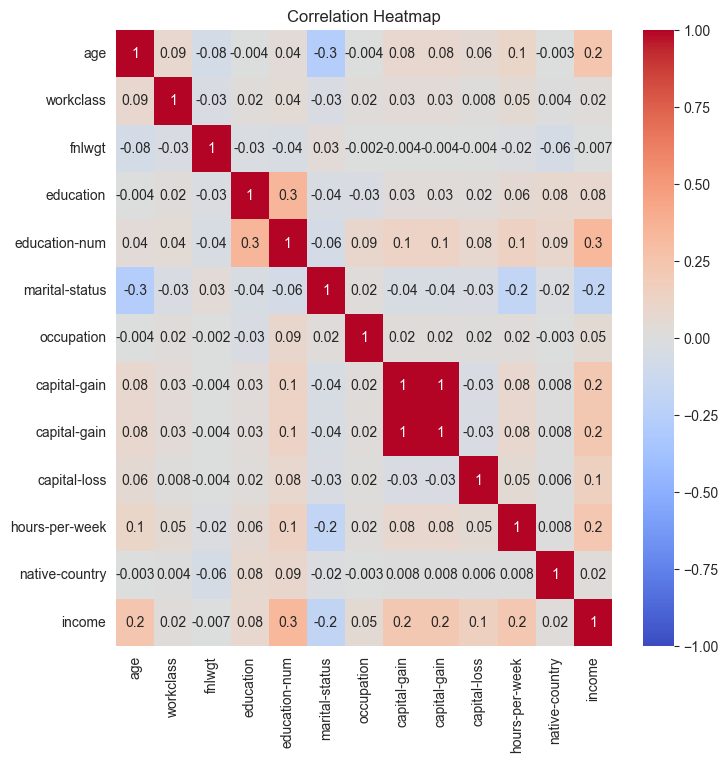

In [443]:
plt.figure(figsize=(8, 8))
corr = df[['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'capital-gain',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income']].corr()  # Получение матрицы корреляции по признакам датасета
corr_heatmap = sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.1g', cmap='coolwarm')
corr_heatmap.set_title('Correlation Heatmap')
plt.savefig("./data/output/correlation_heatmap.png")

## По результатам матрицы корреляции, можно сделать вывод, что некоторые столбцы не влияют на целевое значение, следовательно, их можно удалить

In [444]:
df.drop(['occupation', 'workclass', 'fnlwgt', 'native-country', 'education'], axis=1, inplace=True)
target = df['income']
feature = df.drop('income', axis=1, inplace=False)

## Обучение модели на разных вариантах разбиения тренинговой/тестовой выборки
## Запись результатов для дальнейшей визуализации

In [445]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

metrics_results, models = list(), list()
for train_size in range(60, 91, 10):
    X_train, X_test, y_train, y_test = train_test_split(feature,
                                                        target,
                                                        train_size=train_size / 100,
                                                        random_state=52)
    model = DecisionTreeClassifier(random_state=2003, max_depth=7)
    model.fit(X_train, y_train)
    model_prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, model_prediction)
    precision = precision_score(y_test, model_prediction, average='binary')  # Для бинарной классификации
    recall = recall_score(y_test, model_prediction, average='binary')  # Для бинарной классификации
    fscore = f1_score(y_test, model_prediction, average='binary')
    report = classification_report(y_test, model_prediction)
    
    metrics_results.append([accuracy, precision, recall, fscore, train_size])
    models.append((model, report, train_size))
    print(f"Train size: {X_train.shape}\nTest size: {X_test.shape}")
    print(f'Accuracy: {accuracy_score(y_test, model_prediction)}\n')

Train size: (27133, 19)
Test size: (18089, 19)
Accuracy: 0.8527834595610592

Train size: (31655, 19)
Test size: (13567, 19)
Accuracy: 0.8544998894376059

Train size: (36177, 19)
Test size: (9045, 19)
Accuracy: 0.851077943615257

Train size: (40699, 19)
Test size: (4523, 19)
Accuracy: 0.8576166261330975



In [446]:
X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    train_size=1,
                                                    random_state=52)
model = DecisionTreeClassifier(random_state=2003, max_depth=7)
model.fit(X_train, y_train)
model_prediction = model.predict(X_train)
print(f"Train size: {X_train.shape}\nTest size: {X_test.shape}")
print(f'Accuracy: {accuracy_score(y_train, model_prediction)}\n')

Train size: (1, 19)
Test size: (45221, 19)
Accuracy: 1.0



In [447]:
for model in models:
    print(model[1])
    print('-' * 100)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     13645
           1       0.78      0.56      0.65      4444

    accuracy                           0.85     18089
   macro avg       0.82      0.76      0.78     18089
weighted avg       0.85      0.85      0.84     18089

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     10195
           1       0.80      0.55      0.65      3372

    accuracy                           0.85     13567
   macro avg       0.83      0.75      0.78     13567
weighted avg       0.85      0.85      0.84     13567

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6796
           1       0.79      0.54  

## Графики по полученным результатам

## Визуализация Деревьев Решений

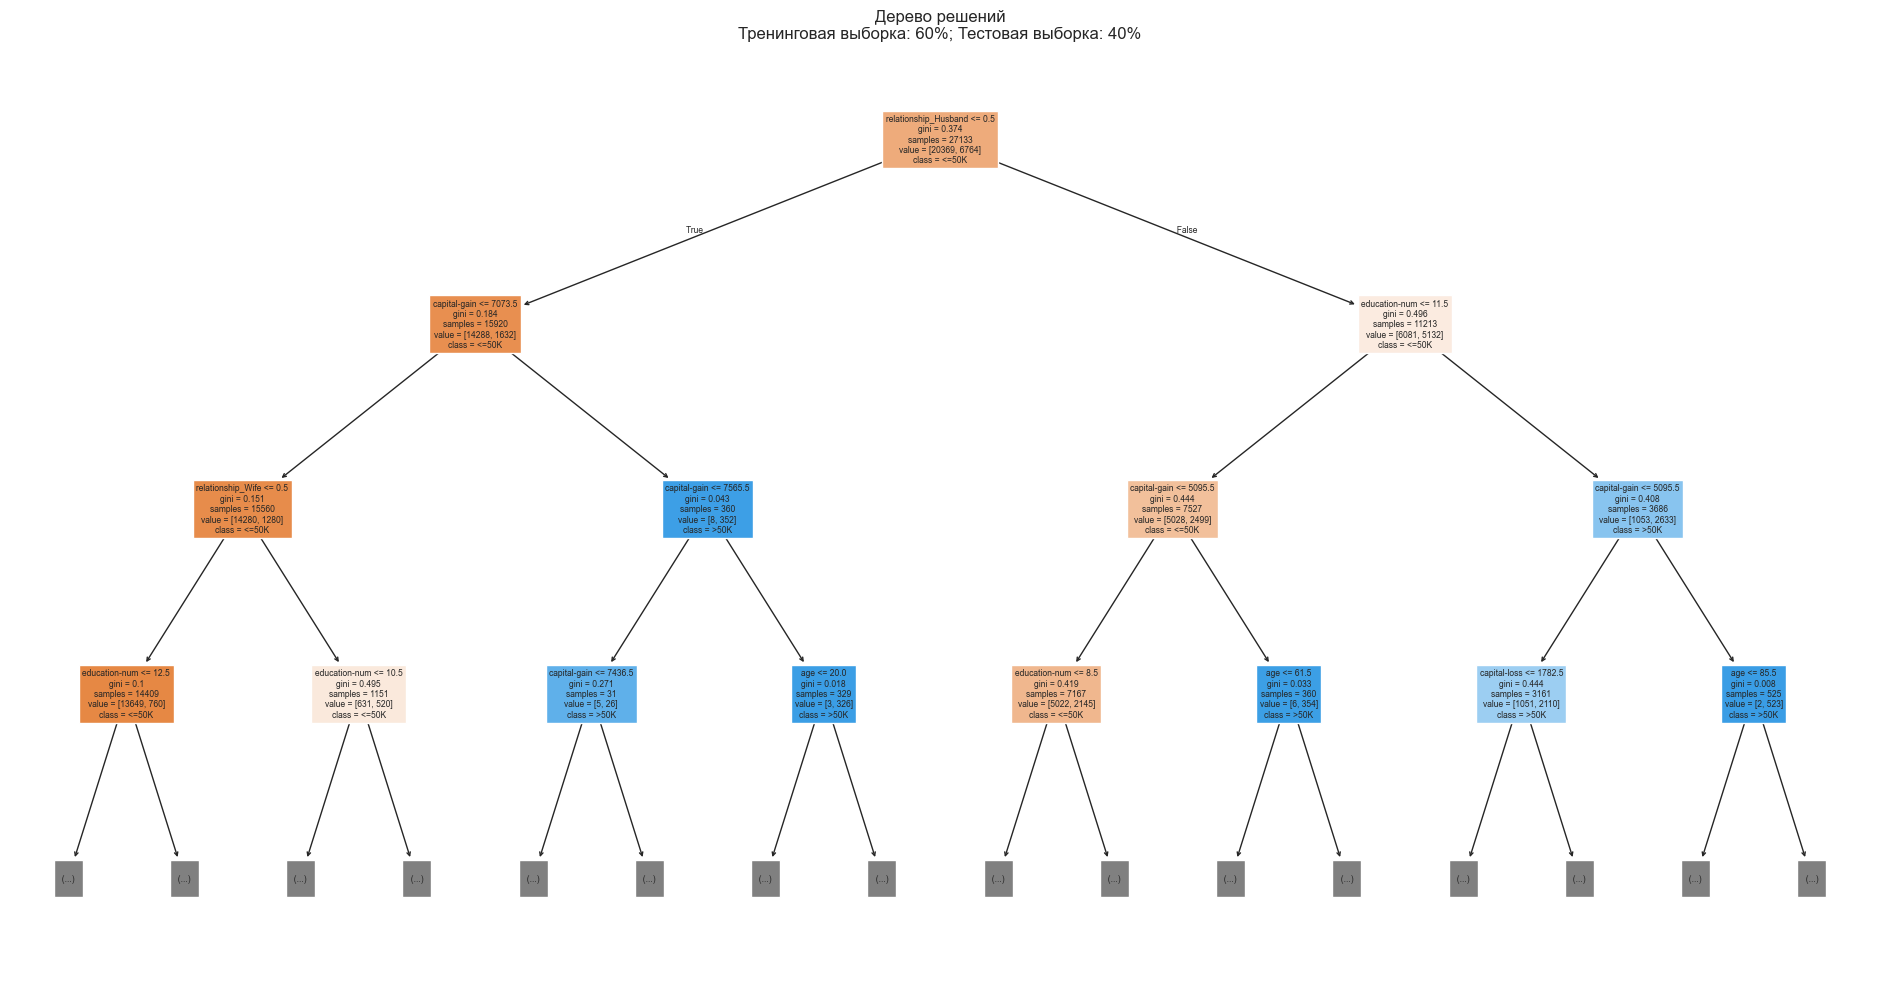

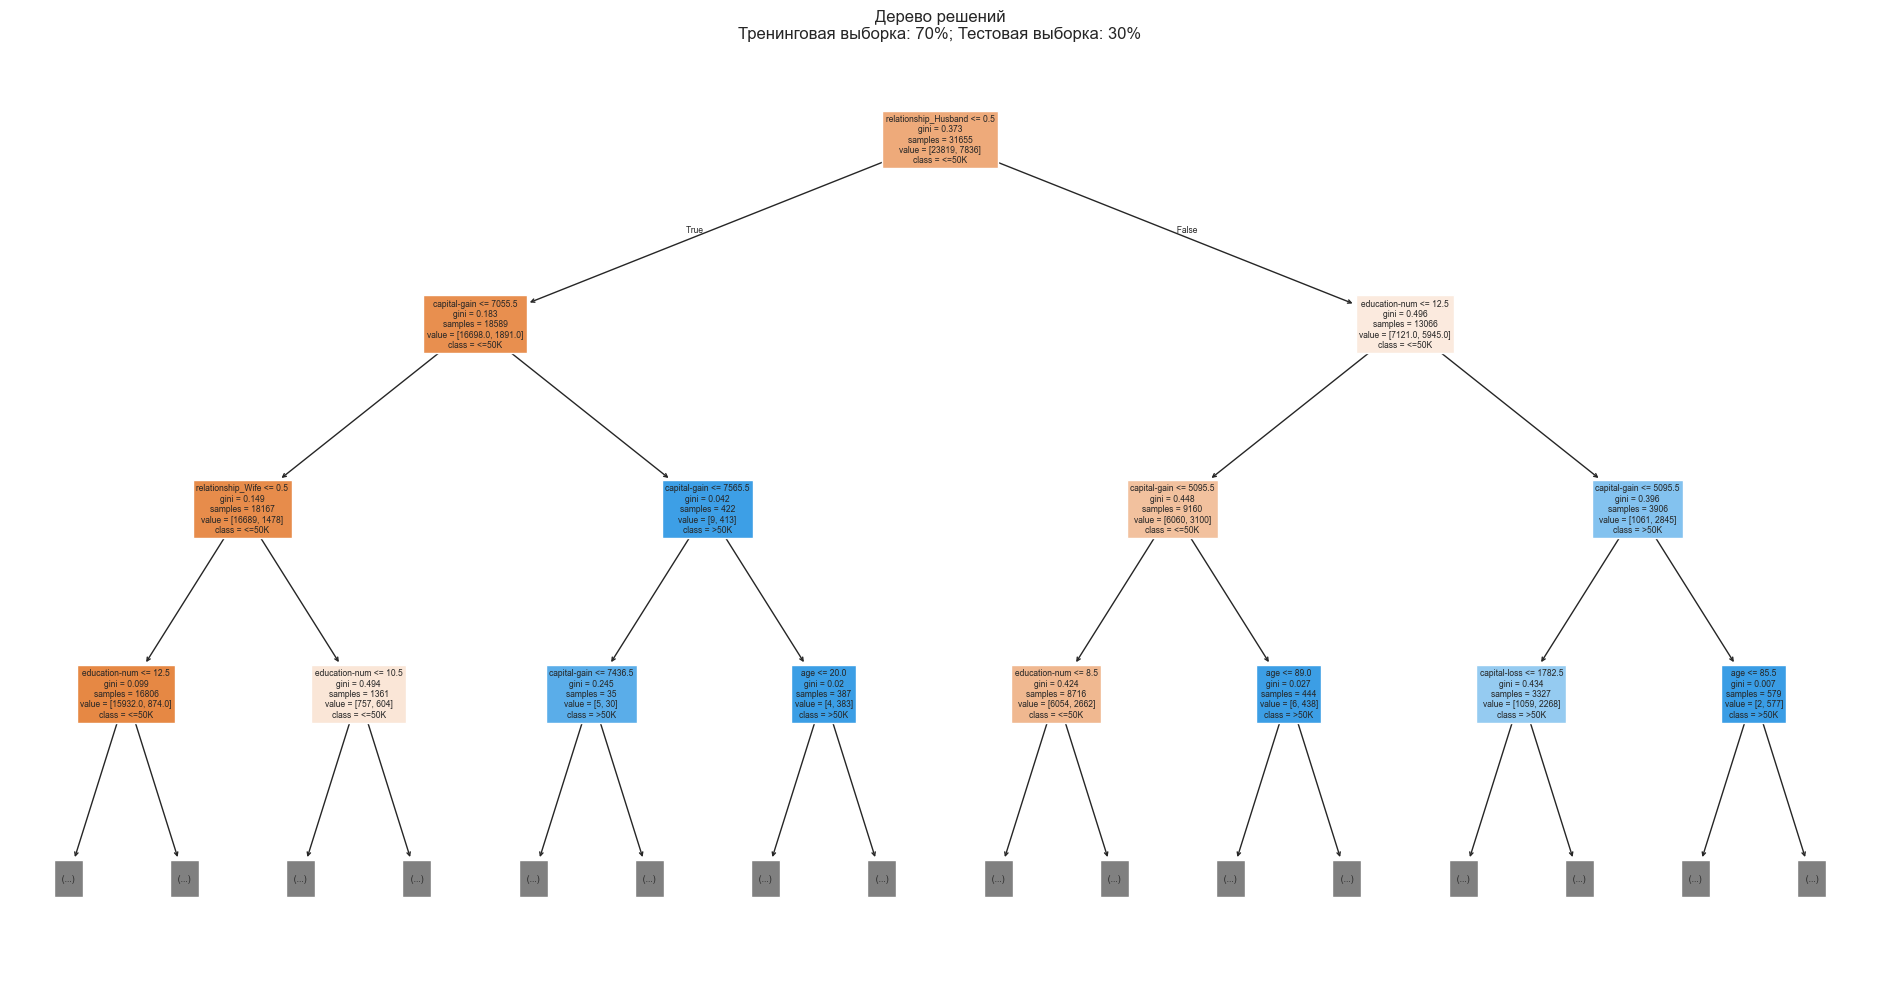

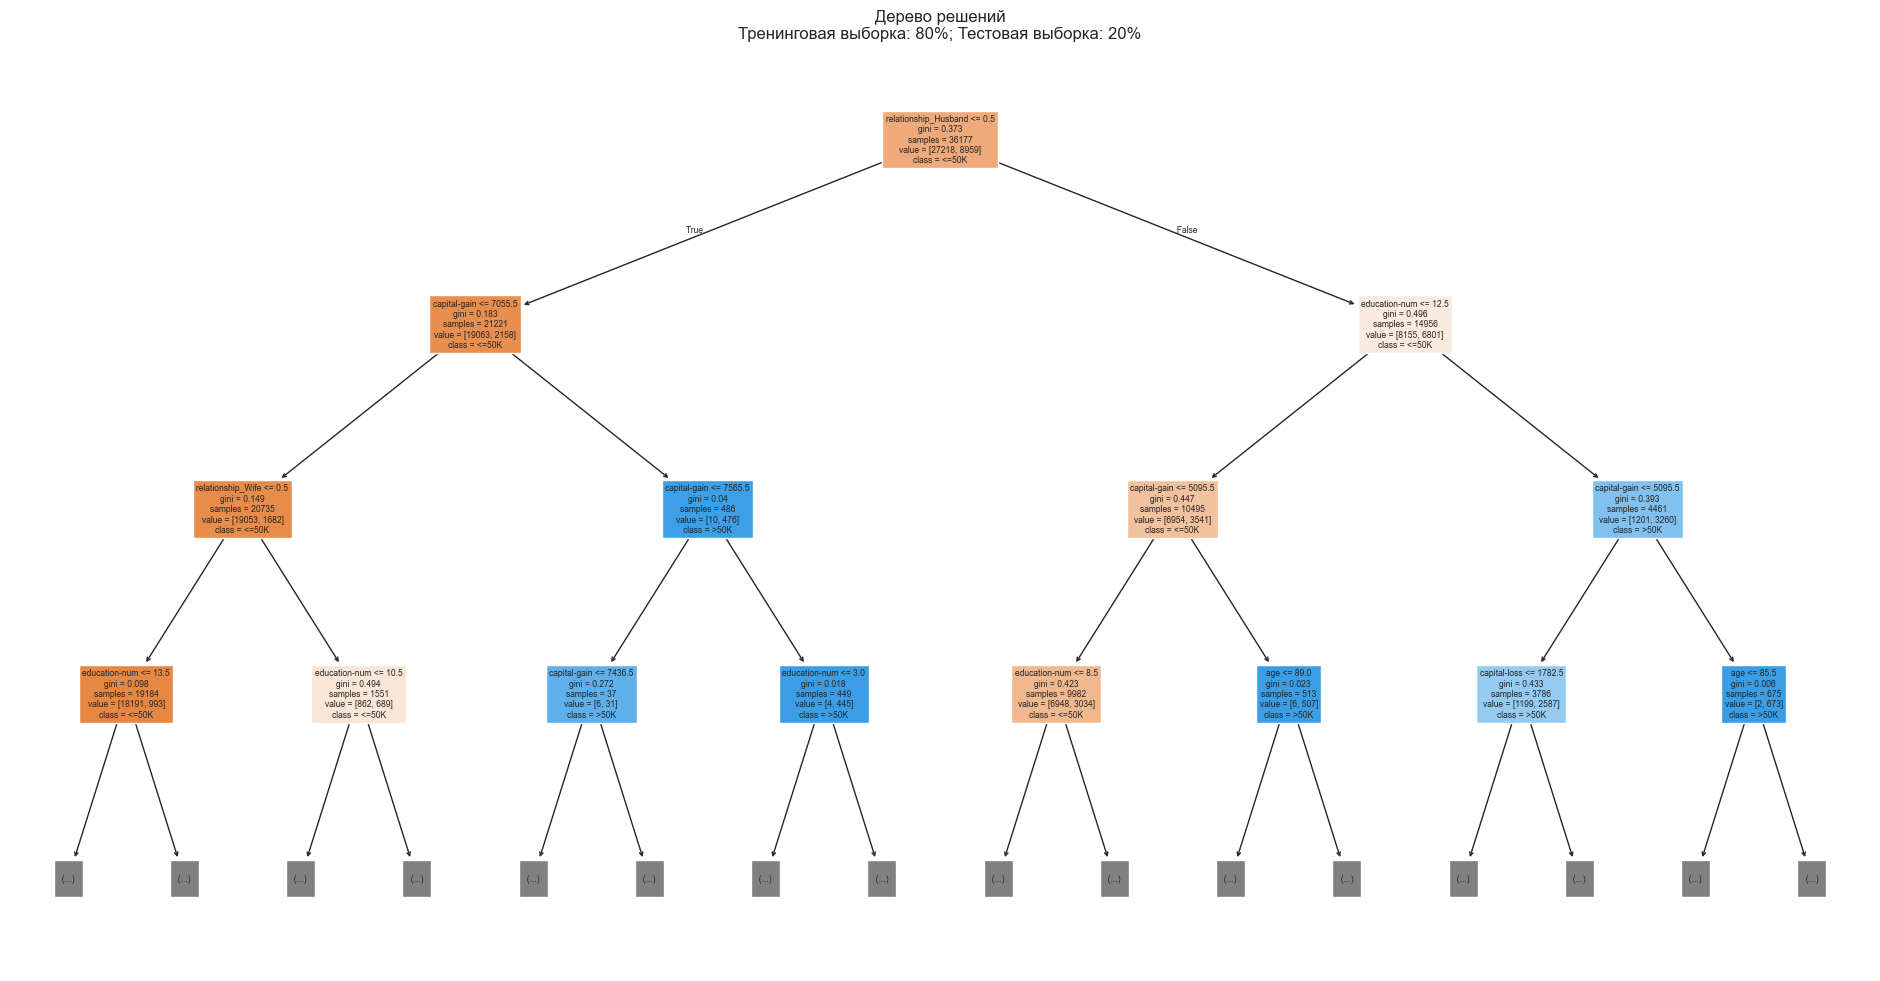

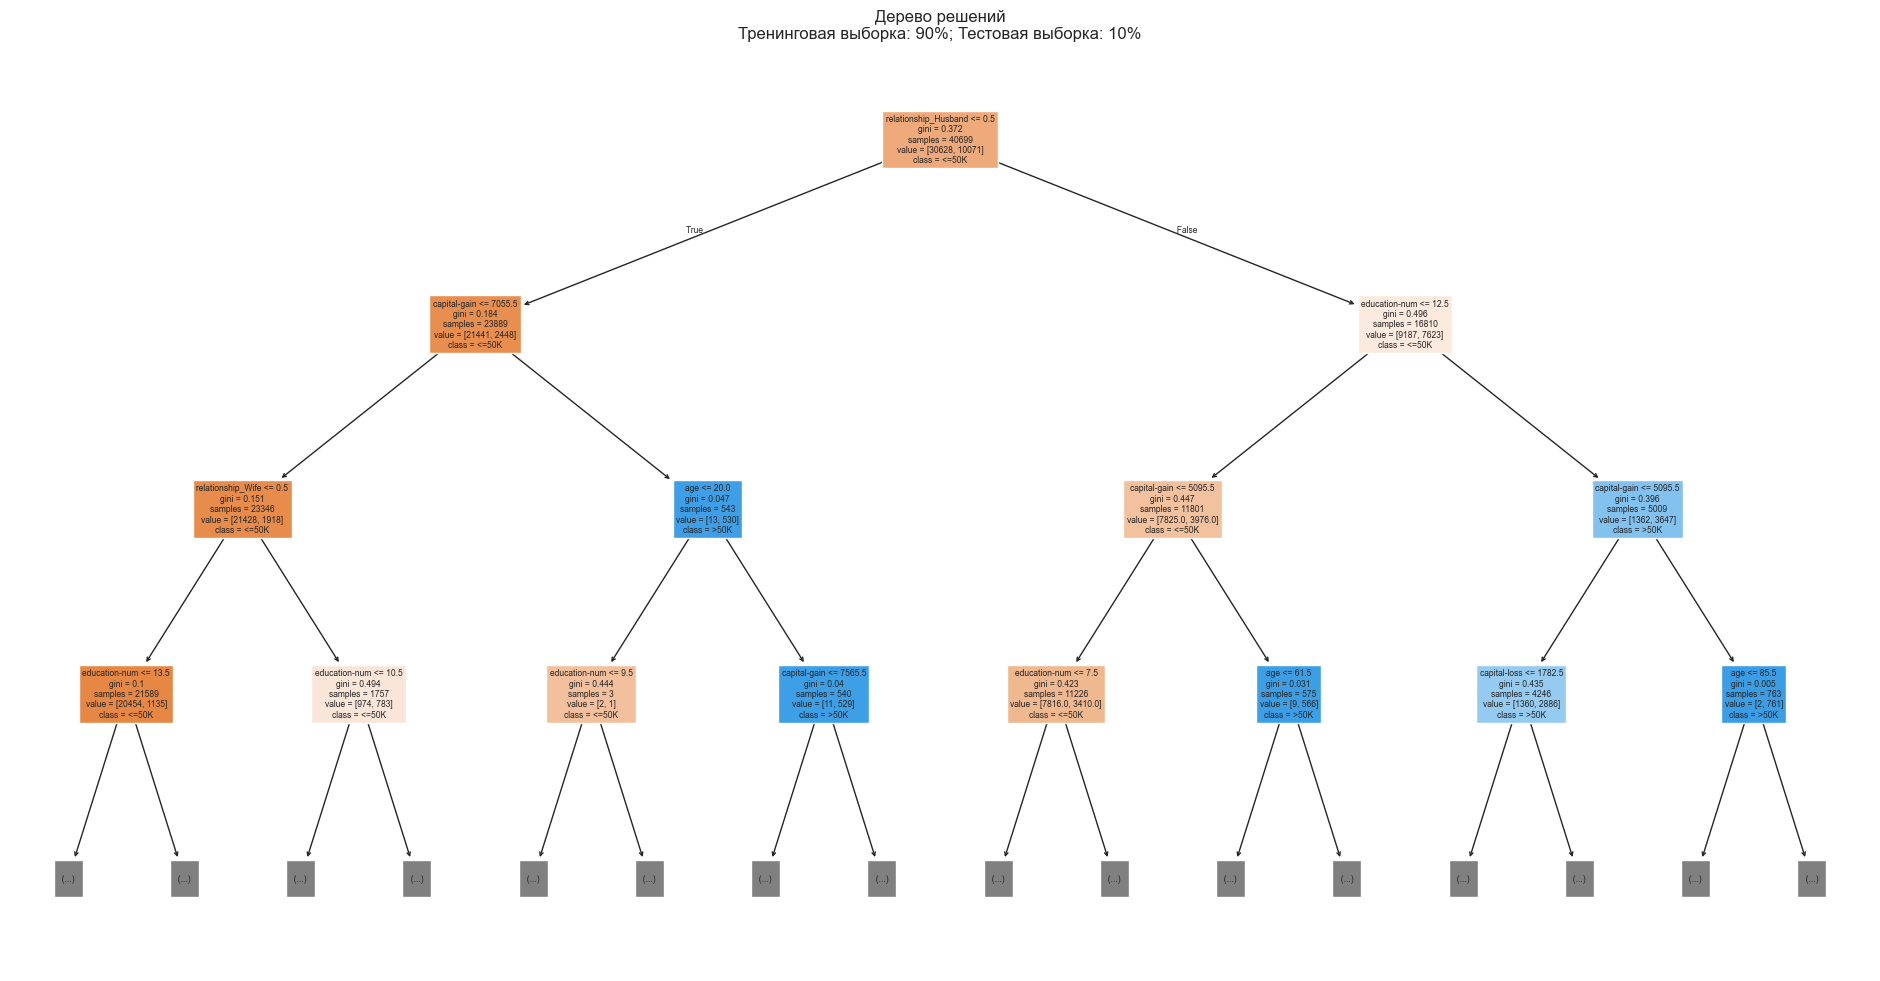

In [448]:
from sklearn.tree import plot_tree

for model_info in models:
    plt.figure(figsize=(24, 12))
    plot_tree(model_info[0], filled=True, feature_names=feature.columns, class_names=['<=50K', '>50K'], max_depth=3)
    plt.title(
        f"Дерево решений\nТренинговая выборка: {round(model_info[2], 2)}%; Тестовая выборка: {(100 - model_info[2])}%")
    # plt.savefig(f"./data/output/tree_{model_info[2] / 100}.pdf")
    # plt.savefig(f"./data/output/tree_{model_info[2] / 100}.jpg")
    plt.show()

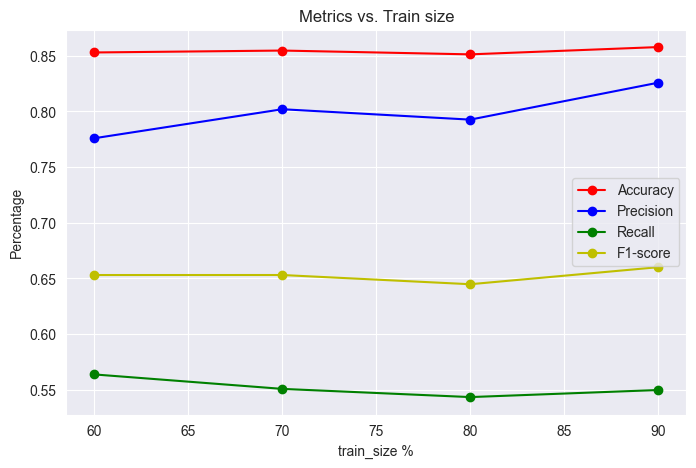

In [455]:
plt.figure(figsize=(8, 5))
plt.plot([m[4] for m in metrics_results], [m[0] for m in metrics_results], marker="o", color="r", label="Accuracy")
plt.plot([m[4] for m in metrics_results], [m[1] for m in metrics_results], marker="o", color="b", label="Precision")
plt.plot([m[4] for m in metrics_results], [m[2] for m in metrics_results], marker="o", color="g", label="Recall")
plt.plot([m[4] for m in metrics_results], [m[3] for m in metrics_results], marker="o", color="y", label="F1-score")
plt.xlabel("train_size %")
plt.ylabel("Percentage")
plt.title("Metrics vs. Train size")
plt.legend()
plt.grid(True)
plt.savefig("./data/output/metrics_vs_train_size.png")
plt.show()

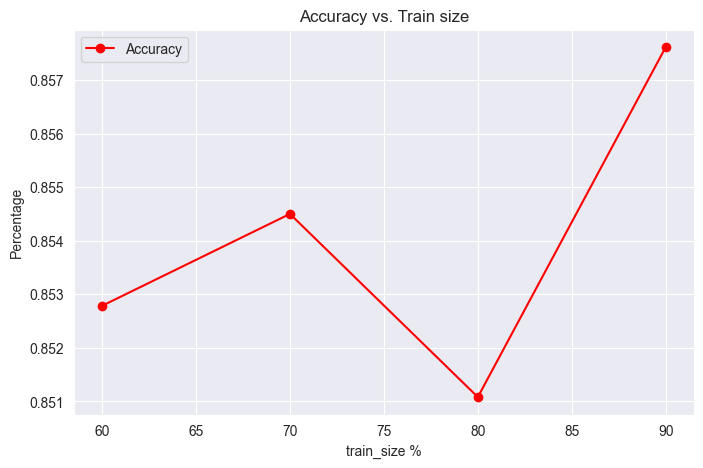

In [454]:
plt.figure(figsize=(8, 5))
plt.plot([m[4] for m in metrics_results], [m[0] for m in metrics_results], marker="o", color="r", label="Accuracy")
plt.xlabel("train_size %")
plt.ylabel("Percentage")
plt.title("Accuracy vs. Train size")
plt.legend()
plt.grid(True)
plt.savefig("./data/output/accuracy_vs_train_size.png")
plt.show()

In [451]:
print(metrics_results[3])

[0.8576166261330975, 0.8256274768824307, 0.5496921723834652, 0.6599788806758183, 90]
